In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
from pandas import read_csv
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
data = pd.read_csv('/content/drive/MyDrive/Machine Learning Test/4S-1_info.csv')
data2=pd.read_csv('/content/drive/MyDrive/Machine Learning Test/4S-2_info.csv')
data_total = pd.read_csv('/content/drive/MyDrive/Machine Learning Test/4S-12_info.csv')
print(data.shape)
print(data.head(10))

(100, 4)
   Cycle      Capa       Endu   Percent
0      1  4.715341  12.155000  0.857335
1      2  4.901805  12.745000  0.891237
2      3  4.890273  12.788333  0.889141
3      4  4.893277  12.786667  0.889687
4      5  4.900183  12.716667  0.890942
5      6  4.897227  12.648333  0.890405
6      7  4.945414  12.976667  0.899166
7      8  4.976928  13.153333  0.904896
8      9  4.843223  12.790000  0.880586
9     10  4.976768  13.213333  0.904867


In [ ]:
pd.DataFrame(data_total)

,Battery,Cycle,Capa,Endu,Percent
0,1,1,4.715341,12.155000,0.857335
1,1,2,4.901805,12.745000,0.891237
2,1,3,4.890273,12.788333,0.889141
3,1,4,4.893277,12.786667,0.889687
4,1,5,4.900183,12.716667,0.890942
...,...,...,...,...,...
194,2,95,4.557404,11.478333,0.828619
195,2,96,4.542978,11.571667,0.825996
196,2,97,4.564483,11.631667,0.829906
197,2,98,4.706755,12.173333,0.855774


In [ ]:
print(data2.shape)
print(data2.head(10))

(99, 4)
   Cycle      Capa       Endu   Percent
0      1  4.682289  12.005000  0.851325
1      2  4.732128  12.401667  0.860387
2      3  4.816168  12.375000  0.875667
3      4  4.850287  12.593333  0.881870
4      5  4.862128  12.563333  0.884023
5      6  4.780820  12.311667  0.869240
6      7  4.900508  12.815000  0.891001
7      8  4.752922  12.538333  0.864168
8      9  4.881117  12.965000  0.887476
9     10  4.858435  12.985000  0.883352


In [ ]:
!cp /content/drive/MyDrive/Machine\ Learning\ Test/NotebookML/lssvr.py /content
from lssvr import LSSVR

In [ ]:
data.describe()

,Cycle,Capa,Endu,Percent
count,100.000000,100.000000,100.000000,100.000000
mean,50.500000,4.772895,12.118117,0.867799
std,29.011492,0.104864,0.432685,0.019066
min,1.000000,4.456968,11.023333,0.810358
25%,25.750000,4.704660,11.830000,0.855393
50%,50.500000,4.785207,12.080000,0.870038
75%,75.250000,4.846403,12.343750,0.881164
max,100.000000,4.976928,13.213333,0.904896


In [ ]:
data2.describe()

,Cycle,Capa,Endu,Percent
count,99.000000,99.000000,99.000000,99.000000
mean,50.000000,4.730785,12.025337,0.860143
std,28.722813,0.085246,0.384103,0.015499
min,1.000000,4.539934,11.141667,0.825442
25%,25.500000,4.682385,11.738333,0.851343
50%,50.000000,4.732021,12.000000,0.860367
75%,74.500000,4.797641,12.229167,0.872298
max,99.000000,4.900508,12.985000,0.891001


In [ ]:
data_total.describe()

,Battery,Cycle,Capa,Endu,Percent
count,199.000000,199.000000,199.000000,199.000000,199.000000
mean,1.497487,50.251256,4.751946,12.071960,0.863990
std,0.501255,28.796345,0.097676,0.410845,0.017759
min,1.000000,1.000000,4.456968,11.023333,0.810358
25%,1.000000,25.500000,4.685915,11.777500,0.851984
50%,1.000000,50.000000,4.757194,12.040000,0.864944
75%,2.000000,75.000000,4.823206,12.308333,0.876946
max,2.000000,100.000000,4.976928,13.213333,0.904896


In [ ]:
data.isnull().sum()

Cycle      0
Capa       0
Endu       0
Percent    0
dtype: int64

In [ ]:
data2.isnull().sum()

Cycle      0
Capa       0
Endu       0
Percent    0
dtype: int64

In [ ]:
list=data_total.duplicated()
print(list)

0      False
1      False
2      False
3      False
4      False
       ...  
194    False
195    False
196    False
197    False
198    False
Length: 199, dtype: bool


In [ ]:
list.describe()

count       199
unique        1
top       False
freq        199
dtype: object

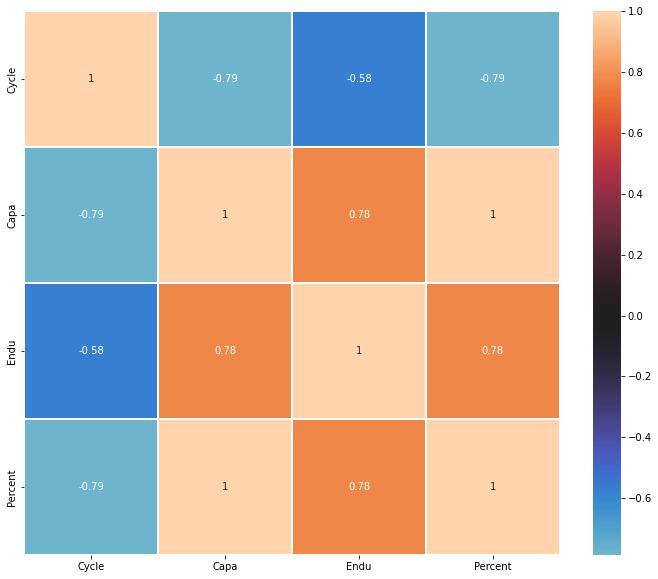

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,10)) # Correlation diagram of features  
corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, center=0,  annot= True, linewidths=0.5)

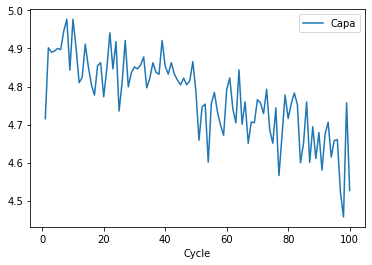

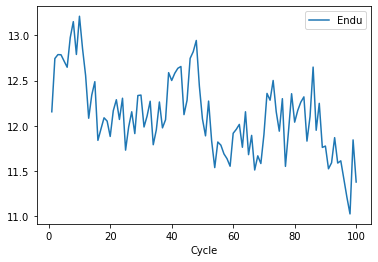

In [ ]:
data.plot('Cycle','Capa')
data.plot('Cycle','Endu')

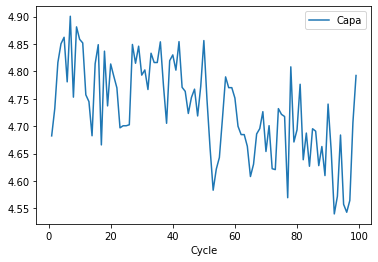

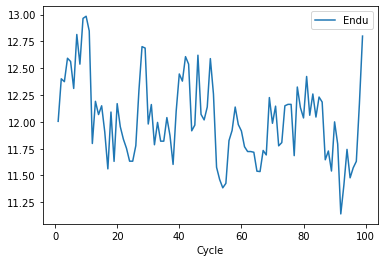

In [ ]:
data2.plot('Cycle','Capa')
data2.plot('Cycle','Endu')

In [ ]:
# Function to remove outlier
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25) # Q1
    q3 = df_in[col_name].quantile(0.75) # Q3
    iqr = q3-q1 # Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

New_data = remove_outlier(data, 'Percent') # remove oulier
#New_data=data
dataDF =pd.DataFrame(New_data) # target of train set   

In [ ]:
dataDF
target=dataDF[['Percent']]
print(target)

     Percent
0   0.857335
1   0.891237
2   0.889141
3   0.889687
4   0.890942
..       ...
94  0.846922
95  0.847331
96  0.822060
98  0.864971
99  0.822985

[99 rows x 1 columns]


In [ ]:
#target=target.to_frame(name='PackVoltx100')

In [ ]:
import numpy as np
from numpy import arange
"""New_data = New_data.drop(['Ampsx100','RPM','PackVoltx100'],axis=1)
"""
# function to normalize data
def normalize_data(df):
    for column in df.columns:
      df[column] = df[column]/1000
    return df
def scale_data(df):
    for column in df.columns:
      df[column] = df[column]*100
    return df
"""
New_data = normalize_data(New_data)
#source = New_data
#.drop(['PackVoltx100','Ampsx100','RPM'],axis=1)
target=normalize_data2(target)"""

"\nNew_data = normalize_data(New_data)\n#source = New_data\n#.drop(['PackVoltx100','Ampsx100','RPM'],axis=1)\ntarget=normalize_data2(target)"

In [ ]:
X=pd.DataFrame(dataDF[['Cycle']])  #Cycle
y=scale_data(target)    #Percent, endu

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [ ]:
'''plt.plot(dataDF.Cycle,dataDF.Percent)
plt.xlabel('Cycle')
plt.ylabel('Capa in %')'''

"plt.plot(dataDF.Cycle,dataDF.Percent)\nplt.xlabel('Cycle')\nplt.ylabel('Capa in %')"

In [ ]:
X2=pd.DataFrame(data2[['Cycle']])
y2=scale_data(pd.DataFrame(data2[['Percent']]))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import SCORERS

In [ ]:
print(SCORERS.keys())

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1) # Divide the data into 2 train set and test set
'''X_train=X
y_train=y
X_test=X2
y_test=y2'''
model_lasso=Lasso(alpha=0.1)
#cv = RepeatedKFold(n_splits=4, n_repeats=3, random_state=1)
#grid = dict()
#grid['alpha']=arange(0, 1, 0.01)
#search=GridSearchCV(model_lasso, grid, scoring='neg_mean_absolute_percentage_error',cv=cv, n_jobs=-1)
model_lasso.fit(X_train, y_train)
y_predic=model_lasso.predict(X_test)
#results=search.fit(X_train,y_train)

In [ ]:
#y_predict=results.predict(X_test)

In [ ]:
print('MAPE',mean_absolute_percentage_error(y_test,y_predic))
print('MSE', mean_squared_error(y_test, y_predic))

MAPE 0.00987624076721964
MSE 0.9866481704184334


In [ ]:
#print('MAPE: %.3f' % results.best_score_)
#print('Config: %s' % results.best_params_)

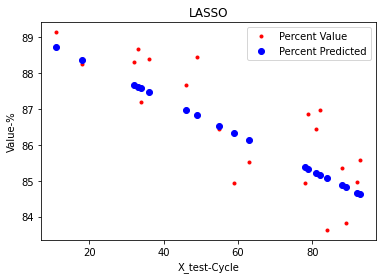

In [ ]:
#plt.scatter(y_test,y_predic) # plot to compare y_predicted and y_test
X_vex1=X_test.Cycle
#X_vex2=X_predic
plt.plot(X_vex1,y_test,'.r',label='Percent Value')
plt.plot(X_vex1,y_predic,'ob',label='Percent Predicted')
#plt.plot(X_test,y_predic['Percent'],'.b')
plt.xlabel('X_test-Cycle') # assign label for x axis
plt.ylabel('Value-%') # assign label for y axis
plt.title('LASSO') # assign title for diagram
plt.legend()
plt.show()

In [ ]:
X_train_gbt, X_test_gbt, y_train_gbt, y_test_gbt = train_test_split(X, y, test_size=0.2)
'''X_train_gbt=X
X_test_gbt=X2
y_train_gbt=y
y_test_gbt=y2'''
model_gbt=GradientBoostingRegressor()
grid_gbt=dict()
grid_gbt['subsample']=[0.1,0.3]
grid_gbt['max_depth']=arange(0, 10, 1)
grid_gbt['n_estimators']=(100,200,300,400)
grid_gbt['learning_rate']=arange(0.01, 0.1, 0.01)
'''X_train_gbt=X_train_gbt.reshape(1,-1)
y_train_gbt=y_train_gbt.reshape(1,-1)
X_test_gbt=X_test_gbt.reshape(1,-1)
y_test_gbt=y_test_gbt.reshape(1,-1)'''
#model_gbt=GradientBoostingRegressor(max_depth=2, n_estimators=100,learning_rate=0.01)
#model_gbt.fit(X_train_gbt,y_train_gbt.values.ravel())
search=GridSearchCV(model_gbt, grid_gbt, scoring='neg_mean_absolute_percentage_error', n_jobs=-1)
results_gbt=search.fit(X_train_gbt,y_train_gbt)
y_predic_gbt=results_gbt.predict(X_test_gbt)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
360 fits failed out of a total of 3600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py", line 596, in fit
    monitor,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py", line 672, in _fit_stages
    X_csr,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py", line 246, in _fit_stage
    t

In [ ]:
print('MAPE: %.3f' % results_gbt.best_score_)
print('Config: %s' % results_gbt.best_params_)

MAPE: -0.009
Config: {'learning_rate': 0.02, 'max_depth': 2, 'n_estimators': 200, 'subsample': 0.1}


In [ ]:
gbt_best=GradientBoostingRegressor(**results_gbt.best_params_)
gbt_best.fit(X_train_gbt,y_train_gbt)
y_predic_gbt=gbt_best.predict(X_test_gbt)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


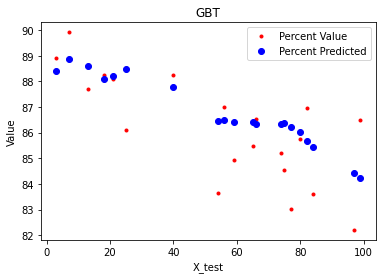

In [ ]:
# plot to compare y_predicted and y_test
X_vex2=X_test_gbt.Cycle
plt.plot(X_vex2,y_test_gbt,'.r',label='Percent Value')
plt.plot(X_vex2,y_predic_gbt,'ob',label='Percent Predicted')
plt.xlabel('X_test') # assign label for x axis
plt.ylabel('Value') # assign label for y axis
plt.title('GBT') # assign title for diagram
plt.legend()
plt.show()

In [ ]:
print('MAPE',mean_absolute_percentage_error(y_test_gbt,y_predic_gbt))
print('MSE', mean_squared_error(y_test_gbt, y_predic_gbt))

MAPE 0.008538747275047272
MSE 0.8042077081061821


In [ ]:
X_train_lssvr,X_test_lssvr,y_train_lssvr,y_test_lssvr= train_test_split(X,y, test_size=0.2)
'''X_train_lssvr=X
X_test_lssvr=X2
y_train_lssvr=y
y_test_lssvr=y2'''
model_lssvr=LSSVR(kernel='linear', gamma=2**-4)
model_lssvr.fit(X_train_lssvr,y_train_lssvr)
y_predic_lssvr = model_lssvr.predict(X_test_lssvr)

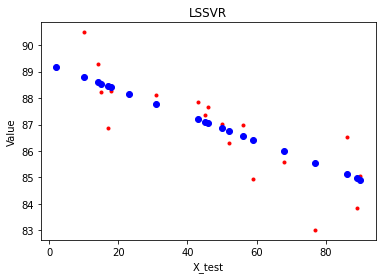

In [ ]:
#
X_vex3=X_test_lssvr.Cycle
plt.plot(X_vex3,y_test_lssvr,'.r')
plt.plot(X_vex3,y_predic_lssvr,'ob') 
plt.xlabel('X_test') # assign label for x axis
plt.ylabel('Value') # assign label for y axis
plt.title('LSSVR') # assign title for diagram
plt.show()

In [ ]:
print('MAPE',mean_absolute_percentage_error(y_test_lssvr,y_predic_lssvr))
print('MSE', mean_squared_error(y_test_lssvr, y_predic_lssvr))

MAPE 0.00846943056289492
MSE 0.9788567882725573


In [ ]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()

In [ ]:
X_train_mlp,X_test_mlp,y_train_mlp,y_test_mlp=train_test_split(X,y, test_size=0.2,random_state=1)
'''X_train_mlp=X
X_test_mlp=X2
y_train_mlp=y
y_test_mlp=y2'''
model_mlp=MLPRegressor(hidden_layer_sizes=(12,12,12),max_iter=100,activation='relu',solver='lbfgs')
model_mlp.fit(X_train_mlp,y_train_mlp.values.ravel())
#.values.ravel()
y_predic_mlp=model_mlp.predict(X_test_mlp)

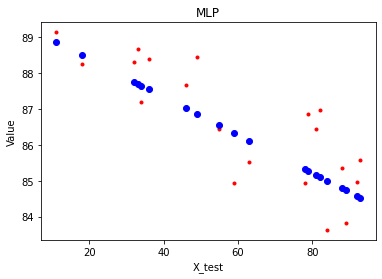

In [ ]:
X_vex4=X_test_mlp.Cycle
#
plt.plot(X_vex4,y_test_mlp,'.r')
plt.plot(X_vex4,y_predic_mlp,'ob')
plt.xlabel('X_test') # assign label for x axis
plt.ylabel('Value') # assign label for y axis
plt.title('MLP') # assign title for diagram
plt.show()

In [ ]:
print('MAPE',mean_absolute_percentage_error(y_test_mlp,y_predic_mlp))
print('MSE', mean_squared_error(y_test_mlp, y_predic_mlp))

MAPE 0.009875873043792439
MSE 0.9833018329920652


In [ ]:
gtktra=([[300]])
y_ktra=model_mlp.predict(gtktra)
#y_ktra=gbt_best.predict(gtktra)
print(y_ktra)

[84.31943008]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  "X does not have valid feature names, but"
